# Importing libraries 

In [2]:
import quandl 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import os 
import warnings 
import nasdaqdatalink

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# Connecting data to api

In [3]:
# quandl.ApiConfig.api_key = '_z_5rnVn8Y7X1b7Za3rt'
# Commented out because we are not going to use quandl

In [62]:
# data = quandl.get('ZSFH/value')
# data = quandl.get('ZILLOW/DATA')
# I commented this out because according to the Python reference page at: https://data.nasdaq.com/databases/ZILLOW#anchor-zillow-data-zillow-data-, I should be using the nasdaqdatalink library

# Nasdaqdatalink.ApiConfig.api_key = _z_5rnVn8Y7X1b7Za3rt
# Nasdaqdatalink.get_table('ZILLOW/DATA',indicator_id='ZSFH', region_id='99999')
# Changed to: Below

nasdaqdatalink.ApiConfig.api_key = '_z_5rnVn8Y7X1b7Za3rt'
data = nasdaqdatalink.get_table('ZILLOW/DATA',indicator_id='ZALL')





print(data)

     indicator_id region_id       date          value
None                                                 
0            ZALL     99999 2024-03-31  470134.085664
1            ZALL     99999 2024-02-29  470587.398347
2            ZALL     99999 2024-01-31  474209.545056
3            ZALL     99999 2023-12-31  477959.273568
4            ZALL     99999 2023-11-30  481187.538356
...           ...       ...        ...            ...
9995         ZALL     99959 2006-10-31  276832.217768
9996         ZALL     99959 2006-09-30  274718.545494
9997         ZALL     99959 2006-08-31  272673.793032
9998         ZALL     99959 2006-07-31  268953.064791
9999         ZALL     99959 2006-06-30  264610.160166

[10000 rows x 4 columns]


# Cleaning and Wrangling

In [54]:
indicators = nasdaqdatalink.get_table('ZILLOW/INDICATORS')
print(indicators)

     indicator_id                                          indicator  \
None                                                                   
0            ZSFH           ZHVI Single-Family Homes Time Series ($)   
1            ZCON                   ZHVI Condo/Co-op Time Series ($)   
2            ZATT           ZHVI All Homes- Top Tier Time Series ($)   
3            ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
4            ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   
5            Z5BR                    ZHVI 5+ Bedroom Time Series ($)   
6            Z4BR                     ZHVI 4-Bedroom Time Series ($)   
7            Z3BR                     ZHVI 3-Bedroom Time Series ($)   
8            Z2BR                     ZHVI 2-Bedroom Time Series ($)   
9            Z1BR                     ZHVI 1-Bedroom Time Series ($)   
10           SSSW  Median Sale Price (Smooth, SFR only, Weekly View)   
11           SSSM      Median Sale Price (Smooth, SFR only, Mont

In [55]:

#Looking at the regions to filter out all data that isn't denver colorado data
regions = nasdaqdatalink.get_table('ZILLOW/REGIONS')
print(regions)




     region_id region_type                                             region
None                                                                         
0        99999         zip   98847;WA;Wenatchee, WA;Leavenworth;Chelan County
1        99998         zip               98846;WA;nan;Pateros;Okanogan County
2        99997         zip    98845; WA; Wenatchee; Douglas County; Palisades
3        99996         zip              98844;WA;nan;Oroville;Okanogan County
4        99995         zip       98843;WA;Wenatchee, WA;Orondo;Douglas County
...        ...         ...                                                ...
9995     87003         zip  65783; MO; Springfield, MO; Dallas County; Win...
9996     87002         zip     65781;MO;Springfield, MO;Willard;Greene County
9997     87001         zip                    65779;MO;nan;nan;Hickory County
9998     87000         zip                  65778;MO;nan;Myrtle;Oregon County
9999       870      county                     Benton County;OR;

In [63]:
#actually filtering the data to only inlude region_id's that are in denver colorado 
denver_regions = regions[(regions['region_type'] == 'zip') & (regions['region'].str.contains('Denver')) & (regions['region'].str.contains('CO;'))]
print(denver_regions)

     region_id region_type                                             region
None                                                                         
4567     93570         zip  80835;CO;Denver-Aurora-Lakewood, CO;Simla;Elbe...
4570     93567         zip  80832;CO;Denver-Aurora-Lakewood, CO;Matheson;E...
4572     93565         zip  80830; CO; Denver-Aurora-Lakewood, CO; Elbert ...
4575     93562         zip  80827;CO;Denver-Aurora-Lakewood, CO;Lake Georg...
4581     93555         zip  80820;CO;Denver-Aurora-Lakewood, CO;Guffey;Par...
...        ...         ...                                                ...
4859     93199         zip  80007;CO;Denver-Aurora-Lakewood, CO;Arvada;Jef...
4860     93197         zip  80005;CO;Denver-Aurora-Lakewood, CO;nan;Jeffer...
4861     93196         zip  80004;CO;Denver-Aurora-Lakewood, CO;Arvada;Jef...
4862     93195         zip  80003;CO;Denver-Aurora-Lakewood, CO;Westminste...
4863     93194         zip  80002;CO;Denver-Aurora-Lakewood, CO;

In [59]:

# #  Before refactoring
# data2 = pd.DataFrame()

# for region_id in denver_regions['region_id']:
#     region_data = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=region_id)
#     data2 = pd.concat([data2, region_data])

# print(data2)

In [64]:
# After refactoring 
#creating a new dataset that only holds values for denver colorado


data3 = pd.DataFrame()
# After refactoring

region_ids = denver_regions['region_id'].tolist()
data3 = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZALL', region_id=region_ids, paginate=True)
# this is only returning a max of 10000 rows, I need it to return all data

print(data3)

# print all the columns



      indicator_id region_id       date          value
None                                                  
0             ZALL     93570 2024-03-31  304444.171763
1             ZALL     93570 2024-02-29  306556.568112
2             ZALL     93570 2024-01-31  308854.797595
3             ZALL     93570 2023-12-31  311356.864359
4             ZALL     93570 2023-11-30  312823.650177
...            ...       ...        ...            ...
42086         ZALL     93194 1996-05-31  125956.000000
42087         ZALL     93194 1996-04-30  125551.000000
42088         ZALL     93194 1996-03-31  124814.000000
42089         ZALL     93194 1996-02-29  124441.000000
42090         ZALL     93194 1996-01-31  123833.000000

[42091 rows x 4 columns]


In [65]:
#filtering out data prior to 2008 since the airbnb data I have starts in 2008

data3['date'] = pd.to_datetime(data3['date'], format='%Y-%m-%d')
filtered_data3 = data3[data3['date'].dt.year >= 2008]
print(filtered_data3)



      indicator_id region_id       date          value
None                                                  
0             ZALL     93570 2024-03-31  304444.171763
1             ZALL     93570 2024-02-29  306556.568112
2             ZALL     93570 2024-01-31  308854.797595
3             ZALL     93570 2023-12-31  311356.864359
4             ZALL     93570 2023-11-30  312823.650177
...            ...       ...        ...            ...
41942         ZALL     93194 2008-05-31  216789.343598
41943         ZALL     93194 2008-04-30  216329.408284
41944         ZALL     93194 2008-03-31  215661.295596
41945         ZALL     93194 2008-02-29  215408.790467
41946         ZALL     93194 2008-01-31  215826.244478

[24717 rows x 4 columns]


In [66]:

subset_filtered_data3 = filtered_data3[['date', 'value']]
print(subset_filtered_data3)


            date          value
None                           
0     2024-03-31  304444.171763
1     2024-02-29  306556.568112
2     2024-01-31  308854.797595
3     2023-12-31  311356.864359
4     2023-11-30  312823.650177
...          ...            ...
41942 2008-05-31  216789.343598
41943 2008-04-30  216329.408284
41944 2008-03-31  215661.295596
41945 2008-02-29  215408.790467
41946 2008-01-31  215826.244478

[24717 rows x 2 columns]


In [67]:
subset_filtered_data3['date'] = pd.to_datetime(subset_filtered_data3['date'])

In [68]:
subset_filtered_data3 = subset_filtered_data3.set_index('date')

In [69]:
subset_filtered_data3.head(5)

value
date                     
2024-03-31  304444.171763
2024-02-29  306556.568112
2024-01-31  308854.797595
2023-12-31  311356.864359
2023-11-30  312823.650177

In [70]:
subset_filtered_data3.shape

(24717, 1)

In [71]:
subset_filtered_data3.columns

Index(['value'], dtype='object')

In [72]:
type(subset_filtered_data3)

pandas.core.frame.DataFrame

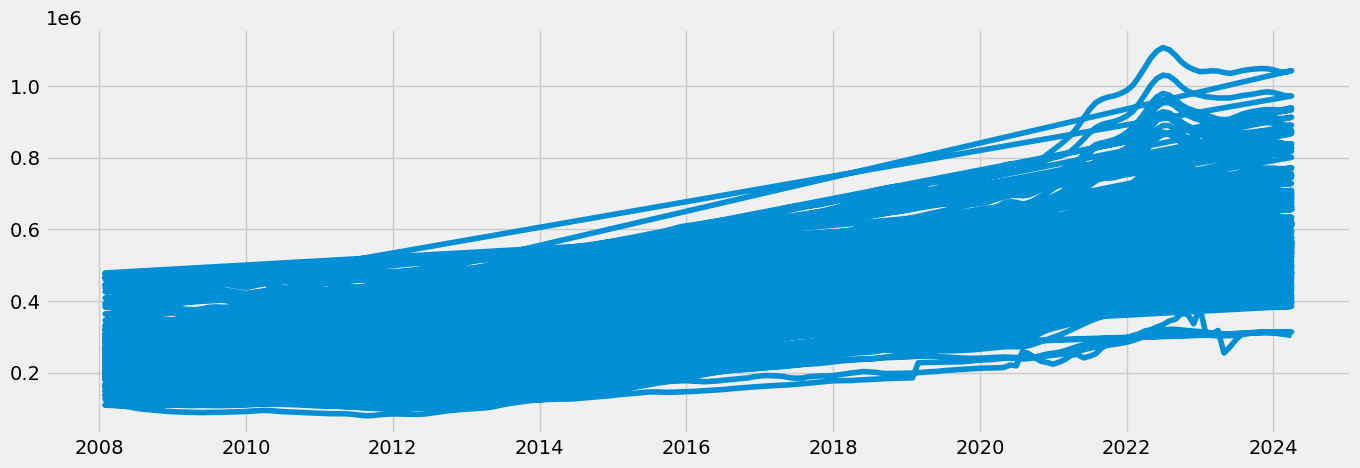

In [73]:
#plotting the data using  matplot lib 
plt.figure(figsize=(15,5), dpi = 100)

plt.plot(subset_filtered_data3)


In [74]:
#checking for missing values 
missing = subset_filtered_data3.isnull().sum()

In [75]:
#checking for duplicates
duplicates = subset_filtered_data3.duplicated().sum()